Importing Required Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [2]:
# loading the dataset to a pandas DataFrame
wine_dataset = pd.read_csv('/content/drive/MyDrive/Datasets/wine Qualitiy/winequality-red.csv')

In [3]:
## first 5 rows of the dataframe
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
## shape of the dataset
wine_dataset.shape

(1599, 12)

In [5]:
# Checking the missing values 
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualization

In [6]:
## statistical measure of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
## getting information of the dataset
wine_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


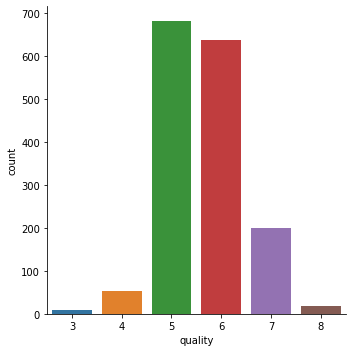

In [8]:
## number of values inn each quality
sns.catplot(x = 'quality', data=wine_dataset, kind='count')

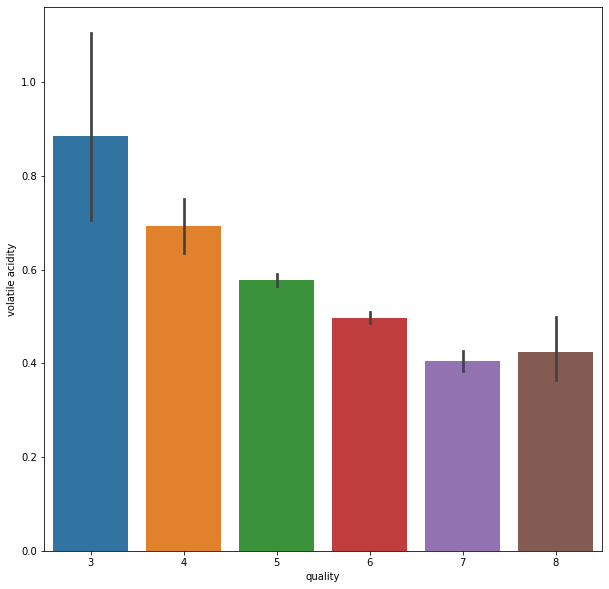

In [11]:
## volatile acidity  vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)
plt.show()

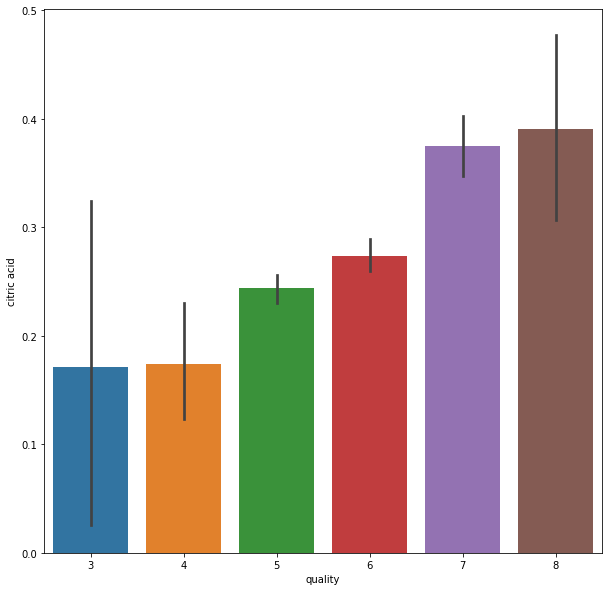

In [12]:
## citric acid  vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)
plt.show()

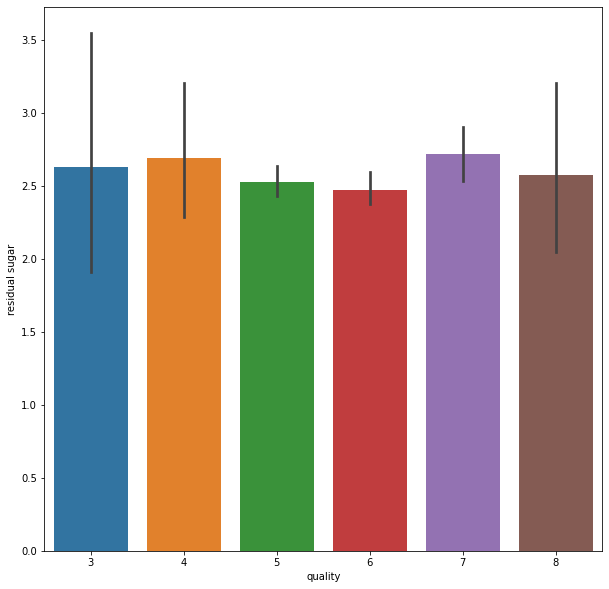

In [13]:
## residual sugar vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='residual sugar', data=wine_dataset)
plt.show()

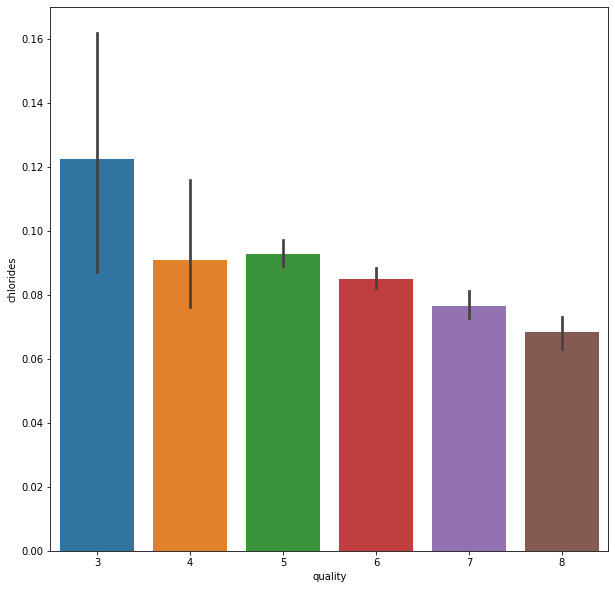

In [14]:
## chlorides  vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='chlorides', data=wine_dataset)
plt.show()

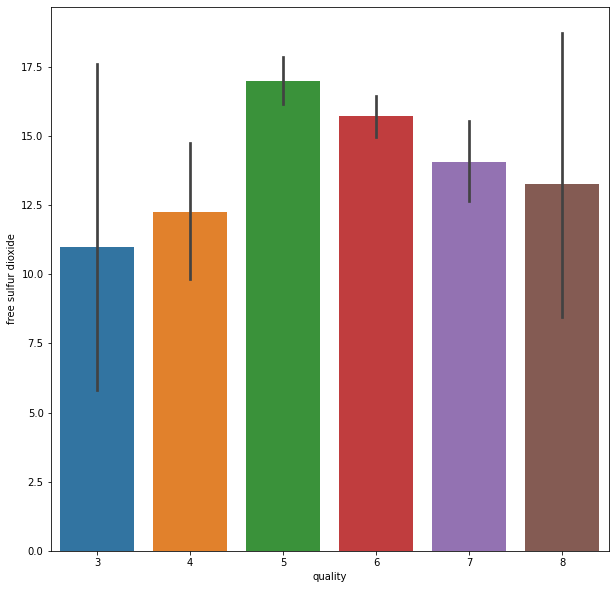

In [16]:
## free sulfur dioxide  vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine_dataset)
plt.show()

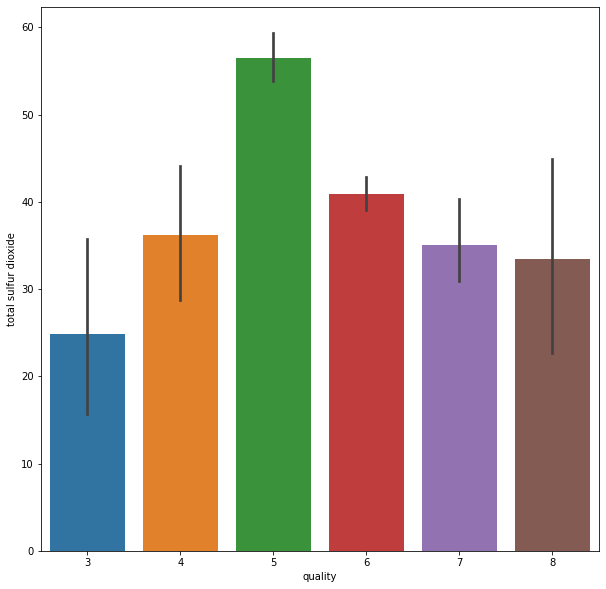

In [17]:
## total sulfur dioxider vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine_dataset)
plt.show()

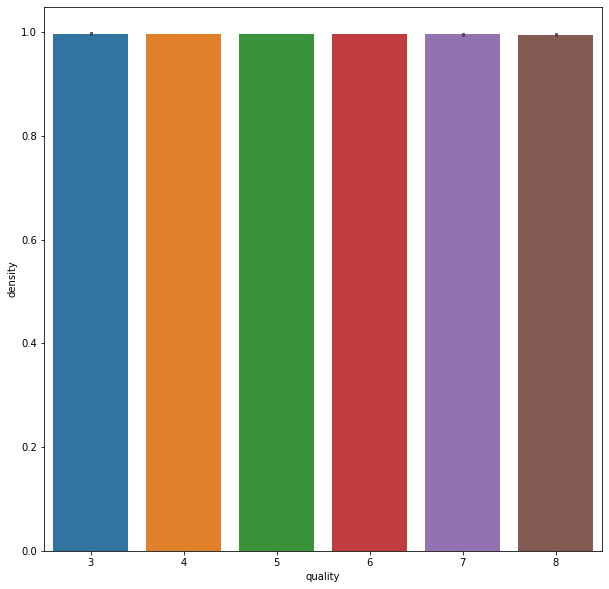

In [19]:
## density vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='density', data=wine_dataset)
plt.show()

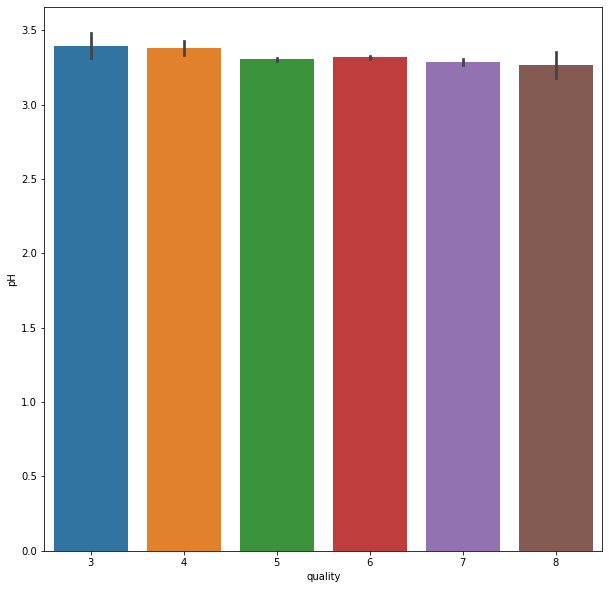

In [20]:
## pH vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='pH', data=wine_dataset)
plt.show()

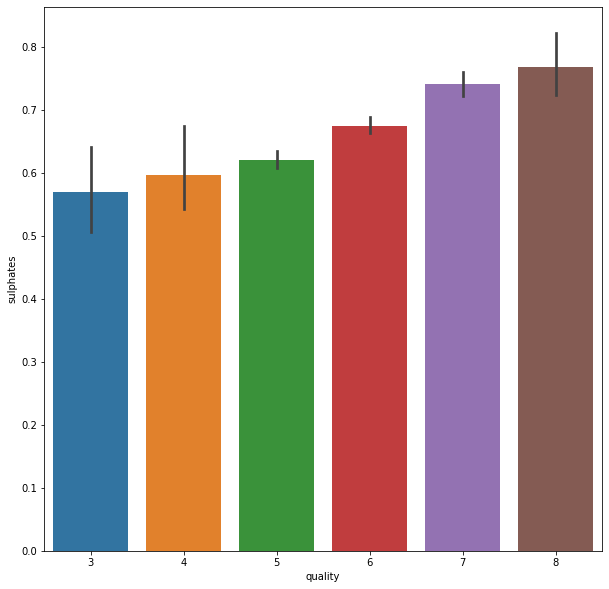

In [22]:
## sulphates vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='sulphates', data=wine_dataset)
plt.show()

In [21]:
wine_dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

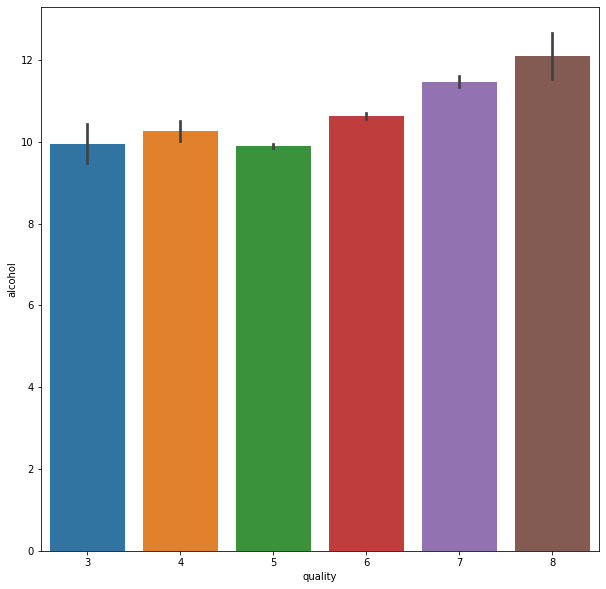

In [23]:
## alcohol vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='alcohol', data=wine_dataset)
plt.show()

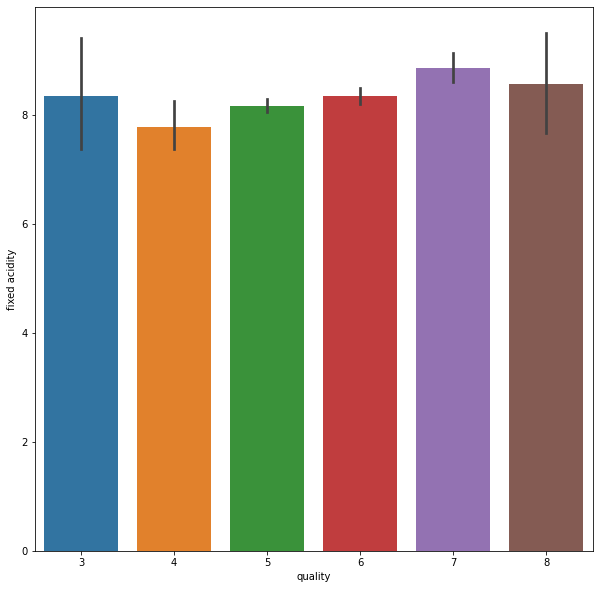

In [25]:
## 'fixed acidity vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='fixed acidity', data=wine_dataset)
plt.show()

Correlation

1. Positive Correlation
2. Negative Correlation

In [26]:
correlation = wine_dataset.corr()

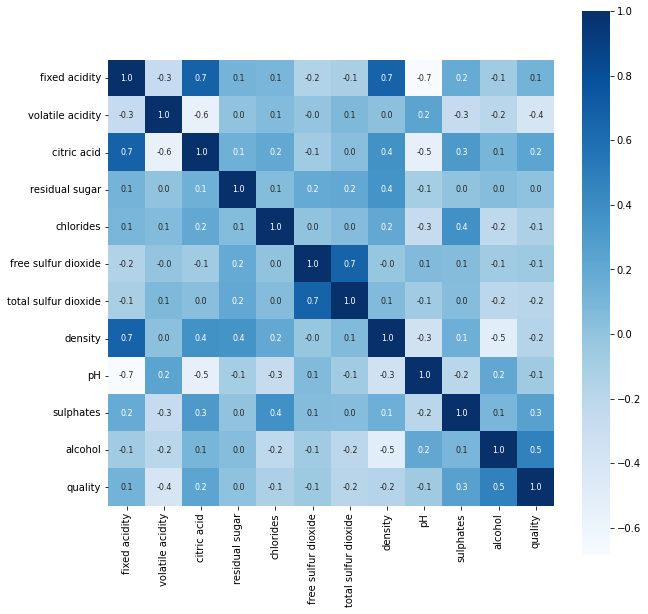

In [30]:
## constructing a heatmap to understand the correlation between the columns

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Data PreProcessing

In [31]:
## separate the data and label
X = wine_dataset.drop('quality',axis=1)

In [33]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

Label Binarization

In [35]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


split dataset into train and test

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training

Random Forest Classifier

In [38]:
model = RandomForestClassifier()

In [39]:
# train our model
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [40]:
## accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [41]:
print(f"Accuracy : {test_data_accuracy}")

Accuracy : 0.915625


Building a predictive system

In [45]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

## changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

## reshape the data we are predicting the label for only for the one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if prediction[0] == 1:
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
0